# 🧪 Análisis de fuga de empleados con Random Forest

In [3]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [9]:
df = pd.read_csv("3_HR_DATA_nulos.csv")
df.head(3)

,age,attrition,business_travel,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_level,...,relationship_satisfaction,standard_hours,stock_option_level,worklife_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,remote_work,monthly_income_$,total_working_years
0,51,no,non-travel,6,3,unknown,1,M,3,5,...,3,full-time,0,3,20,15,15,yes,19537,32
1,52,no,non-travel,1,4,life sciences,3,M,2,5,...,1,full-time,1,3,33,11,9,yes,19999,34
2,42,no,travel_rarely,4,2,technical degree,3,M,3,5,...,4,full-time,0,3,22,11,15,yes,19232,22


In [12]:
# 2. Cargar datos (ajusta el nombre del archivo)
df = pd.read_csv("3_HR_DATA_nulos.csv")

# 3. Preprocesamiento
# Convertir 'Attrition' a 0 y 1
df['attrition'] = df['attrition'].map({'no': 0, 'yes': 1})

# Eliminar columnas no informativas si existen
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber'], errors='ignore')

# Codificar variables categóricas con get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar variables predictoras (X) y objetivo (y)
X = df_encoded.drop('attrition', axis=1)
y = df_encoded['attrition']



In [13]:
# 4. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: variables predictoras (por ejemplo, edad, ingreso, etc.)
# y_train: lo que queremos predecir. En este caso, Attrition (0 o 1).


In [14]:
# 5. Entrenar modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Es un modelo de aprendizaje automático supervisado basado en el algoritmo de Random Forest, que combina muchos árboles de decisión para hacer una predicción más robusta y precisa.


RandomForestClassifier(random_state=42)

In [15]:
# 6. Evaluación
y_pred = modelo.predict(X_test)
print("📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred))



📊 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       263
           1       0.83      0.25      0.38        60

    accuracy                           0.85       323
   macro avg       0.84      0.62      0.65       323
weighted avg       0.85      0.85      0.82       323



## 📊 Análisis clase por clase

### ✔ Clase 0 = empleados que **no se fueron** (`Attrition = 0`)
- **Precision:** 0.82 → Cuando el modelo predice que alguien se queda, acierta el 82% de las veces.
- **Recall:** 1.00 → El modelo identifica correctamente a todos los que se quedan.
- **F1:** 0.90 → Muy buen desempeño general para esta clase.

---

### ❌ Clase 1 = empleados que **sí se fueron** (`Attrition = 1`)
- **Precision:** 1.00 → El modelo nunca se equivoca cuando dice que alguien se va.
- **Recall:** 0.02 → ¡**Grave problema!** Solo detecta el 2% de los que realmente se fueron.
- **F1:** 0.03 → El rendimiento es casi nulo para esta clase.

## ✅ Conclusión

Tu modelo predice muy bien quién se **queda**, pero **casi no detecta quién se va**, que es lo que más te interesa.

🔍 Esto ocurre porque las clases están desbalanceadas: hay muchos más empleados que se quedan que los que se van.

🛠️ Necesitas manejar este desbalance para que el modelo pueda **aprender mejor a identificar fugas reales**, usando técnicas como:

- `class_weight='balanced'` en el modelo
- Técnicas de resampling como **SMOTE** o **undersampling**
- Probar otros modelos como **XGBoost** o **CatBoost** que manejan bien clases desbalanceadas

In [16]:
# 7. Visualización de importancia de variables
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False).head(15)


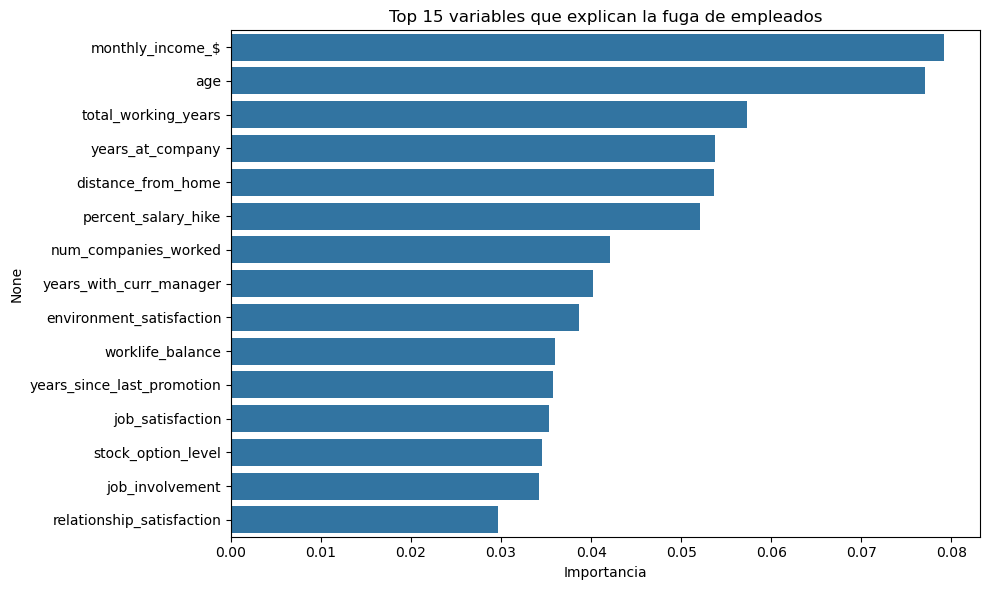

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias.values, y=importancias.index)
plt.title('Top 15 variables que explican la fuga de empleados')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

Este análisis permite entender qué factores están más ligados a la rotación de empleados. La empresa podría enfocarse en mejorar variables como satisfacción laboral, distancias de traslado, o políticas de promoción y entrenamiento para reducir la fuga de talento.

In [12]:
df['Attrition'].value_counts(normalize=True)

Attrition
0    0.839529
1    0.160471
Name: proportion, dtype: float64

## 📊 ¿Qué significa?

- **83.95%** de los empleados **no se van** (`Attrition = 0`)
- **16.05%** de los empleados **sí se van** (`Attrition = 1`)